In [ ]:

#!pip install torch 
#!pip install torchsummary
#!pip install torchvision


import torch
import os
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchsummary import summary
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from cnn_trainer import CNN

model_dir = '.pth'
test_data_dir = 'data_for_model_1/test/'

# Load the model
model = CNN(num_classes=2)
model.load_state_dict(torch.load(model_dir))
model.eval() 

# Convert input picture to tensor
transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
        transforms.Resize((21, 21)),                  # Resize to desired dimensions
        transforms.ToTensor()   
   ])

# Load data set
dataset = datasets.ImageFolder(test_data_dir,transform=transform)

batch_size = 1
test_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

print("Classes:", dataset.classes)
print("Training samples:", dataset)

# Test the model
correct = 0.0
wrong_predictions = {"pictures": [], "probs": [], "predictions":[],"targets":[]}


Classes: ['square', 'triangle']
Training samples: Dataset ImageFolder
    Number of datapoints: 100
    Root location: dataset/test/
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               Resize(size=(21, 21), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


C:\Users\hskay\AppData\Local\Temp\ipykernel_17224\1339594605.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_dir))


In [4]:
with torch.no_grad():
    for images, targets in test_loader:
        
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        if predicted.item() != targets.item():
            # Convert from (C, H, W) to (H, W, C)
            image = images[0].permute(1, 2, 0).numpy()  
            wrong_predictions["pictures"].append(image)

            # Get probability of the predicted class
            prob = nn.functional.softmax(outputs, dim=1)[0][predicted.item()]
            wrong_predictions["probs"].append(prob)

            # Get the predicted class
            wrong_predictions["predictions"].append(dataset.classes[predicted.item()])
            wrong_predictions["targets"].append(dataset.classes[targets.item()])
            
        correct += (predicted == targets).sum().item()

print(f"Accuracy: {100 * correct / len(dataset):.2f}%")


Accuracy: 99.00%


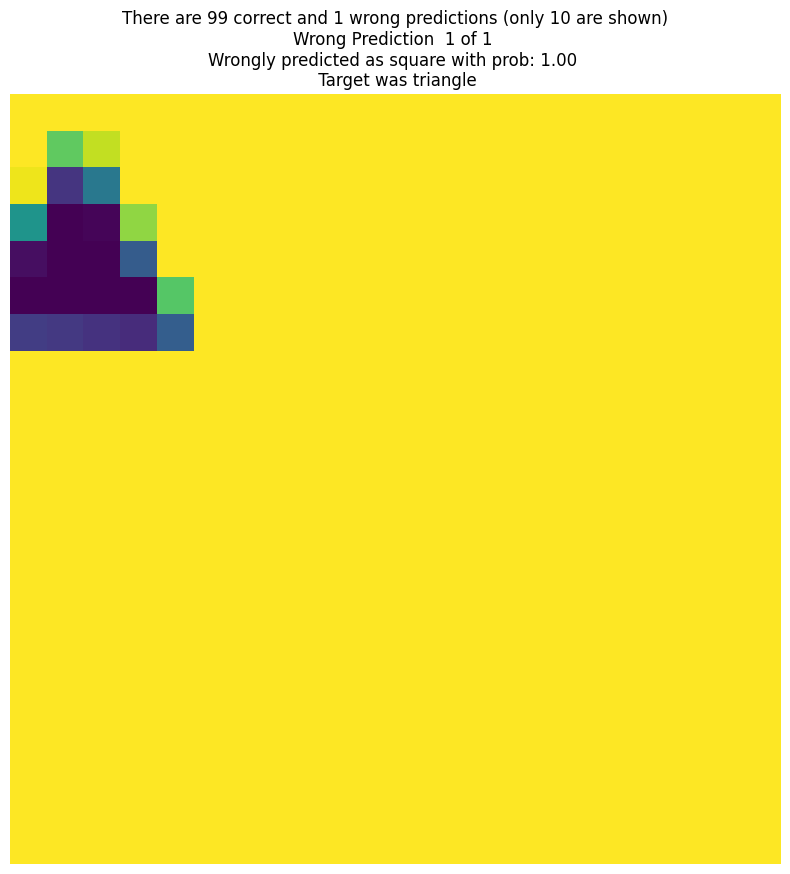

In [7]:
# Plot wrong predictions
fig = plt.figure(figsize=(20, 10))
with torch.no_grad():
    for i in range(min(10,len(wrong_predictions["pictures"]))):
        
        plt.imshow(wrong_predictions["pictures"][i])
        plt.title(f"There are {int(correct)} correct and {int(len(dataset)-correct)} wrong predictions (only 10 are shown)\nWrong Prediction  {i+1} of {min(10,len(wrong_predictions['pictures']))} \nWrongly predicted as {wrong_predictions['predictions'][i]} with prob: {wrong_predictions['probs'][i]:.2f} \n Target was {wrong_predictions['targets'][i]}")
        plt.axis('off')
        # plt.savefig(f'wrong_predictions_of_{model_dir[:-4]}_in_test_data/wrong_prediction_{i}.png')
        plt.show()